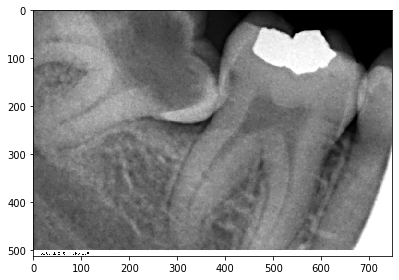

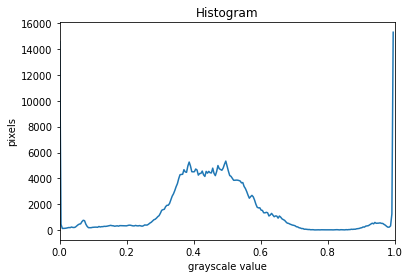

In [11]:
import sys
import numpy as np
import skimage.color
import skimage.io
from matplotlib import pyplot as plt


image = skimage.io.imread(fname="/content/30.jpg", as_gray=True)
skimage.io.imshow(image)

# create the histogram
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 1))

# configure and draw the histogram figure
plt.figure()
plt.title("Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0.0, 1.0])  

plt.plot(bin_edges[0:-1], histogram)  
plt.show()

#FINAL CODE

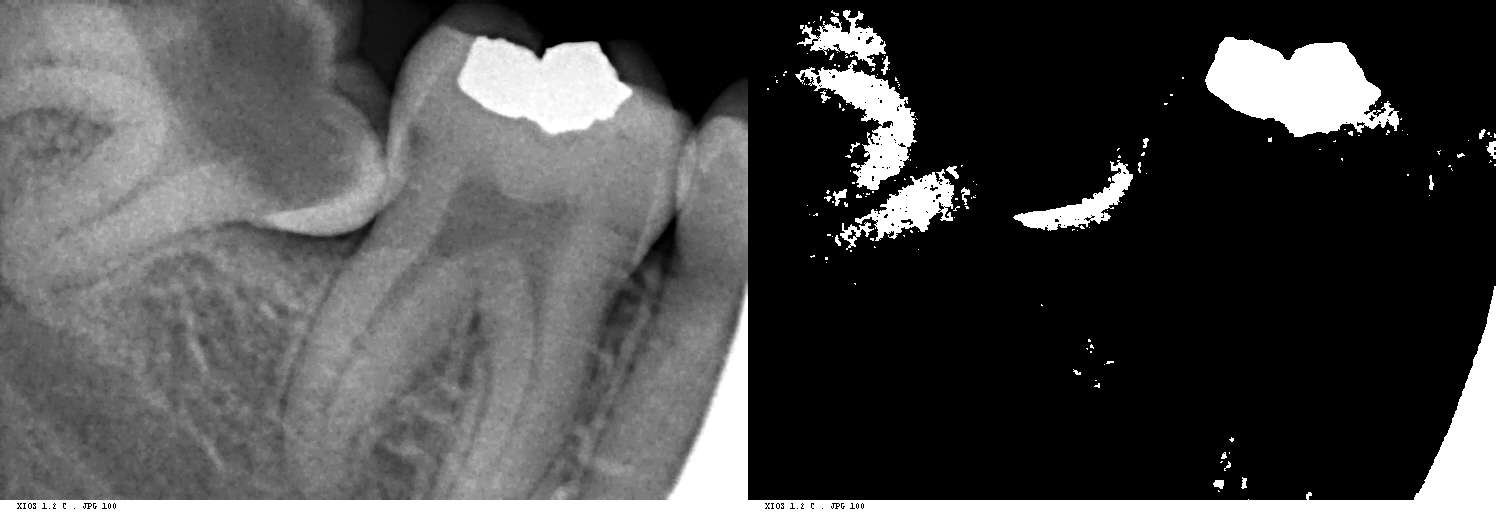

-1

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def calc_threshold(img, thres,delta_T):
    # Divide the input image in two parts
    x_min, y_min = np.where(img<=thres)
    x_max, y_max = np.where(img>thres)
    
    # Find the mean of these two parts of the input image 
    low_mean = np.mean(img[x_min,y_min])
    high_mean = np.mean(img[x_max,y_max])
    
    # Calculation of new threshold
    new_thres = (low_mean + high_mean)/2
    
    # Stopping criteria
    if abs(new_thres-thres)< delta_T:
        return new_thres
    else:
        return calc_threshold(img, new_thres,delta_T)

# Input image 
img = cv2.imread('/content/30.jpg',cv2.IMREAD_GRAYSCALE)

# Calculate the threshold using the created function
op1 = calc_threshold(img, 1,0.8)
ret, thresh = cv2.threshold(img,op1,255,cv2.THRESH_BINARY)

#Output image
out = cv2.hconcat([img,thresh])
cv2_imshow(out)
cv2.waitKey(0)